# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/boston_housing/master/housing.csv')

RM' is the average number of rooms among homes in the neighborhood.

'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).

'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

In [ ]:
df.sample(10)

,RM,LSTAT,PTRATIO,MEDV
369,4.652,28.28,20.2,220500.0
90,6.417,8.81,17.8,474600.0
332,6.696,7.18,17.6,501900.0
305,5.914,18.33,18.4,373800.0
34,6.096,20.34,21.0,283500.0
353,3.561,7.12,20.2,577500.0
389,4.138,23.34,20.2,249900.0
418,6.629,23.27,20.2,281400.0
49,5.602,16.20,17.9,407400.0
25,5.599,16.51,21.0,291900.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [ ]:
#plotting to see the relationship between each features and MEDV

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

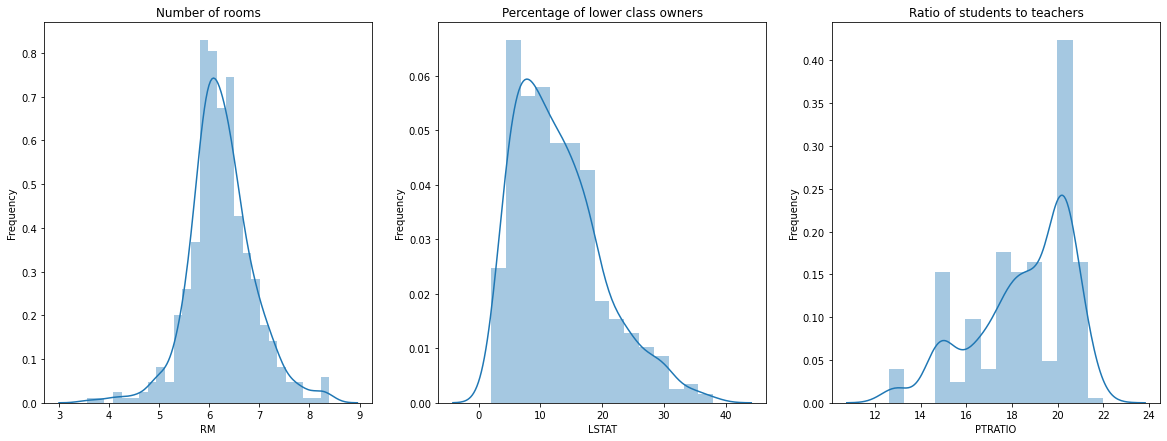

In [ ]:
plt.figure(figsize = (20, 7))
plt.subplot(131)
plt.title('Number of rooms')
sns.distplot(df['RM'])
plt.ylabel('Frequency')

plt.subplot(132)
plt.title('Percentage of lower class owners')
sns.distplot(df['LSTAT'])
plt.ylabel('Frequency') 

plt.subplot(133)
plt.title('Ratio of students to teachers')
sns.distplot(df['PTRATIO'])
plt.ylabel('Frequency')
plt.show()

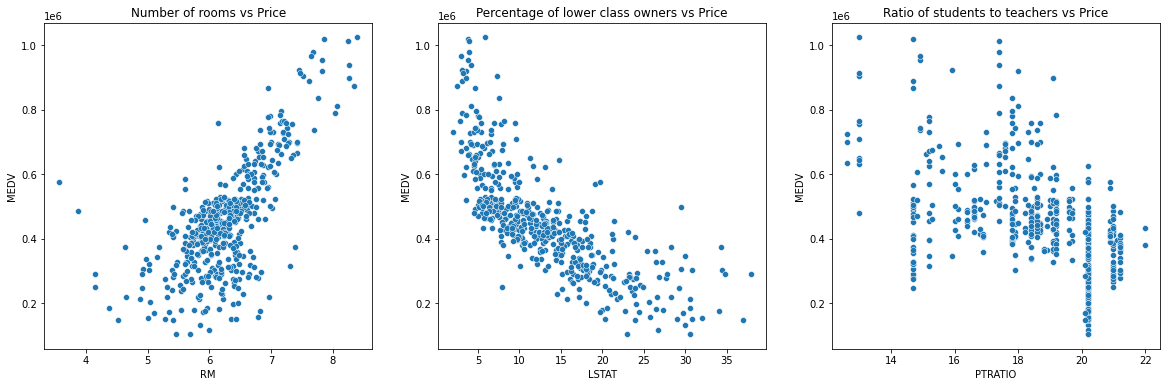

In [ ]:
plt.figure(figsize = (20, 6))
plt.subplot(131)
plt.title('Number of rooms vs Price')
sns.scatterplot(x=df['RM'], y=df['MEDV'])

plt.subplot(132)
plt.title('Percentage of lower class owners vs Price')
sns.scatterplot(x=df['LSTAT'], y=df['MEDV'])

plt.subplot(133)
plt.title('Ratio of students to teachers vs Price')
sns.scatterplot(x=df['PTRATIO'], y=df['MEDV'])
plt.show()


# KNN

## Choosing k

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X, y = df.drop(columns = ['MEDV']), df['MEDV']

In [ ]:
#design pipeline
preprocessor = Pipeline([('scaler', StandardScaler())])
X_transformed = preprocessor.fit_transform(X)

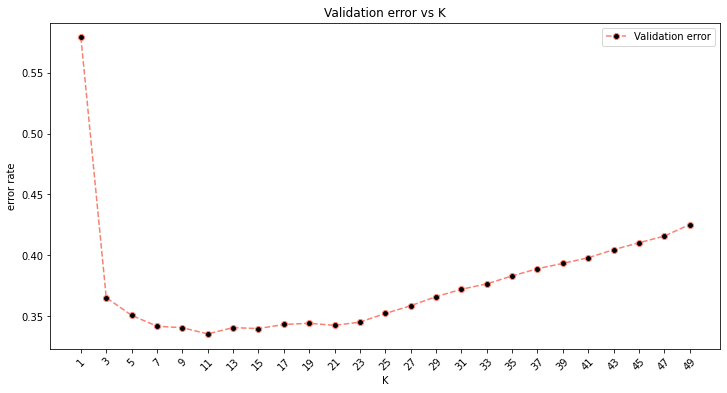

In [ ]:
#using cross validation to choose the best k, using r2 scoring
val_error_rate = []
neighbor_range = range(1, 50, 2)
for i in neighbor_range:
    knn = KNeighborsRegressor(n_neighbors=i, weights='uniform', p=2)
    val_error = 1 - cross_val_score(knn, X_transformed, y, cv = 5, scoring = 'r2').mean()
    val_error_rate.append(val_error)

plt.figure(figsize=(12, 6))
plt.plot(neighbor_range, val_error_rate, linestyle = 'dashed', color = 'salmon', marker = 'o', markerfacecolor='black', label = 'Validation error')
plt.xticks(np.arange(neighbor_range.start, neighbor_range.stop, neighbor_range.step), rotation=45)
plt.legend()
plt.title('Validation error vs K')
plt.xlabel('K')
plt.ylabel('error rate')
plt.show()

We will choose k=11 as our hyperparameter for knn model

Note: in sklearn, KNeighborRegressor uses R2 for score

R2, however, are only good to evaluate linear model (My mistake! Thank you Luke for pointing this out. Reference: https://statisticsbyjim.com/regression/r-squared-invalid-nonlinear-regression/). So for this one, it's actually better to use MAE (mean absolute error) as another metrics to compare non-linear ML models

In [ ]:
#should print the scores out to check
print(mean_absolute_error(y_true,y_pred))

## Design final pipeline and model

We will first run model with k=11

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['MEDV']), df['MEDV'], test_size = 0.2, random_state = 50)

In [ ]:
#design pipeline again to put in our model
final_pipe = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors=11, weights='uniform', p=2))])
final_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=11, p=2,
                                     weights='uniform'))],
         verbose=False)

In [ ]:
#predict training and test data
y_train_pred = final_pipe.predict(X_train)
y_test_pred = final_pipe.predict(X_test)
train_score = final_pipe.score(X_train, y_train)
test_score = final_pipe.score(X_test, y_test)
print(f'Score of train set: {train_score}\n\nScore of test set: {test_score}')

Score of train set: 0.8571117991528211

Score of test set: 0.823256675383812


In [ ]:
X_test.shape

(98, 3)

In [ ]:
#Final test
X_t = pd.DataFrame(data = [[5, 17.0, 15], [4, 32, 22], [8, 3, 12]])
y_t_pred = final_pipe.predict(X_t)
print(y_t_pred)

[374754.54545455 231763.63636364 857754.54545455]


In [ ]:
df[(df['MEDV'] < 260000) & (df['MEDV']> 200000)]

,RM,LSTAT,PTRATIO,MEDV
144,4.903,29.29,14.7,247800.0
362,6.223,21.78,20.2,214200.0
363,6.968,17.21,20.2,218400.0
364,6.545,21.08,20.2,228900.0
365,5.536,23.60,20.2,237300.0
366,5.520,24.56,20.2,258300.0
369,4.652,28.28,20.2,220500.0
371,4.880,30.62,20.2,214200.0
372,5.390,20.85,20.2,241500.0
375,5.036,25.68,20.2,203700.0


After looking at the houses in similar range, the first and the the third prices seem more reasonable than the 2nd price. It's because comparing to other houses in the similar price range, the second house has the worst features but it has the highest price. 

As the score for the model is around 80%, I think we can get its prediction but just for reference. 

When you print out the coefficience and the graphs to see the relationship between each features so the PTRATIO and price has moderate correlation, weaker than others

## Use GridSearchCV

In [ ]:
#using gridsearchCV
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
neighbor_range = list(range(1, 100, 2))
p = [1,2]
parameter = dict(n_neighbors=neighbor_range, p=p)
grid = GridSearchCV(knn, parameter, cv = 5, scoring='r2')
grid.fit(X_transformed, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59, ...],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
print(grid.best_estimator_)
print(grid.best_params_)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=1,
                    weights='uniform')
{'n_neighbors': 15, 'p': 1}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['MEDV']), df['MEDV'], test_size = 0.2, random_state = 50)

In [ ]:
final_pipe = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors=15, p=1))])
final_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=15, p=1,
                                     weights='uniform'))],
         verbose=False)

In [ ]:
y_train_pred = final_pipe.predict(X_train)
y_test_pred = final_pipe.predict(X_test)
y_train_score = final_pipe.score(X_train, y_train)
test_score = final_pipe.score(X_test, y_test)
print(f'Score of train set: {train_score}\n\nScore of test set: {test_score}')

Score of train set: 0.8571117991528211

Score of test set: 0.8251476184214879


In comparison between manually finding K and using GridSearchCV, using k and p chosen by GridSearchCV did help the score for test set improve but just an insignifican amount. 

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['MEDV']), df['MEDV'], test_size = 0.2, random_state = 50)

In [ ]:
#design pipeline again to put in our model
final_pipe = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])
final_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
#predict training and test data
y_train_pred = final_pipe.predict(X_train)
y_test_pred = final_pipe.predict(X_test)
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
print(f'Score of train set: {train_score}\n\nScore of test set: {test_score}')

Score of train set: 0.705129386350591

Score of test set: 0.7686078411973889


## Using Ridge

In [ ]:
#using Ridge to check
from sklearn.linear_model import Ridge 
X,y = df.drop(columns = ['MEDV']), df['MEDV']

In [ ]:
#design pipeline
# preprocessor = Pipeline([('scaler', StandardScaler())])
# X_transformed = preprocessor.fit_transform(X)
#no need to use this, we will use normalize in Ridge 

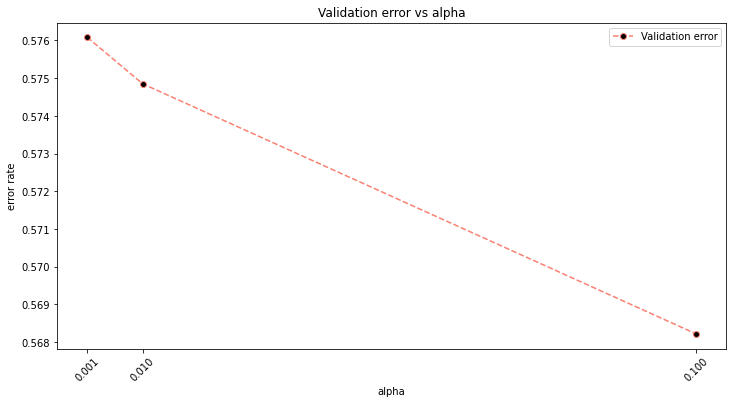

In [ ]:
#using cross validation to choose the best k, using r2 scoring
val_error_rate = []
alpha_range = [0.001, 0.01, 0.1]
for i in alpha_range:
    ridge = Ridge(alpha=i, normalize=True)
    val_error = 1 - cross_val_score(ridge, X, y, cv = 5, scoring = 'r2').mean()
    val_error_rate.append(val_error)

plt.figure(figsize=(12, 6))
plt.plot(alpha_range, val_error_rate, linestyle = 'dashed', color = 'salmon', marker = 'o', markerfacecolor='black', label = 'Validation error')
plt.xticks((alpha_range), rotation=45)
plt.legend()
plt.title('Validation error vs alpha')
plt.xlabel('alpha')
plt.ylabel('error rate')
plt.show()

So here we will choose alpha = 0.1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['MEDV']), df['MEDV'], test_size = 0.2, random_state = 50)

In [ ]:
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
print(f'r2 score of train set: {train_score}\n\nr2 score of test set: {test_score}')

r2 score of train set: 0.7031737442330546

r2 score of test set: 0.7624478607914132


Note: I think KNN is working better since it is more flexible since we don't make an assumption about our f(x) (that our features have linear relationships)

# Conclusion

The fact that the data was collected in 1978 makes this data set less relevant to today-market. Inflation plays an important role here as many factors in society, economy and market have changed which results in the difference in house prices. Hence, using this data set to predict current house prices will only be good for reference

Though the 3 features we have here are important in determining the price of a house, it is insufficient. There are many other factors that may influence the price, for example, the condition of the house or of the appliances, the availibility of extra things like pools, garages,...

As our model only has 3 features and not that complex, it may not be consistent in prediction if we putting in some odd cases. And obviously a model that is trained with urban dataset would be insufficient to apply to rural areas because of the differences in their characteristics. Those characteristics in a sense would decide the influential degree of different features in the 2 kinds of areas. 

In my opinion, it is not really fair to judge the price of a house based only on its surroundings (neighborhood). These features certainly are important and have big influences on the price, but there are other features that may play an important role as well

